# Machine Learning prediction of Lateritic Concrete

### Importing the dataset

In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/pc/Desktop/Bamidele Project/Damilare's data-2.xlsx")
df.info()
rows, cols = df.shape
print(f"This data has {rows} rows and {cols} columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Water/cement ratio            440 non-null    float64
 1    Laterite (%)                 440 non-null    float64
 2   cement density(kg/m2)         440 non-null    float64
 3   concrete density              278 non-null    float64
 4   coarse agg                    440 non-null    float64
 5   laterite density              440 non-null    float64
 6   sand density                  440 non-null    float64
 7   fine agg                      440 non-null    float64
 8   water density                 440 non-null    float64
 9   cement                        300 non-null    float64
 10  fine                          300 non-null    float64
 11  coarse                        208 non-null    float64
 12  Age(Days)                     440 non-null    int64  
 13  Compr

In [2]:
df.head()

,Water/cement ratio,Laterite (%),cement density(kg/m2),concrete density,coarse agg,laterite density,sand density,fine agg,water density,cement,fine,coarse,Age(Days),Compressive Strength (N/mm2),Source
0,0.500,100.0,776.000000,2328.0,776.000000,776.000000,0.0,776.000000,388.000000,1.0,1.00,1.0,28,21.48,The Suitability of Using Laterite as Sole Fine...
1,0.550,100.0,517.333333,2328.0,776.000000,1034.666667,0.0,1034.666667,284.533333,1.0,2.00,1.5,28,13.63,The Suitability of Using Laterite as Sole Fine...
2,0.650,100.0,517.333333,2328.0,1034.666667,776.000000,0.0,776.000000,336.266667,1.0,1.50,2.0,28,14.46,The Suitability of Using Laterite as Sole Fine...
3,0.600,100.0,582.000000,2328.0,873.000000,873.000000,0.0,873.000000,349.200000,1.0,1.50,1.5,28,18.07,The Suitability of Using Laterite as Sole Fine...
4,0.525,100.0,620.800000,2328.0,931.200000,776.000000,0.0,776.000000,325.920000,1.0,1.25,1.5,28,19.85,The Suitability of Using Laterite as Sole Fine...


Renaming the Coloumns

In [3]:
df = df.rename(columns={'Water/cement ratio':'w/c_ratio', ' Laterite (%)':'perc_laterite', 'cement density(kg/m2)':'cement_density',
       'concrete density':'concrete_density', 'laterite density':'laterite_density','sand density':'sand_density','coarse agg':'coarse_agg', 'fine agg':'fine_agg', 'water density':'water_density', 'cement':'cement',
       'fine':'fine', 'coarse':'coarse', 'Age(Days)':'age', 'Compressive Strength (N/mm2)':'compressive_strength',
       'Source':'source'})
df.columns

Index(['w/c_ratio', 'perc_laterite', 'cement_density', 'concrete_density',
       'coarse_agg', 'laterite_density', 'sand_density', 'fine_agg',
       'water_density', 'cement', 'fine', 'coarse', 'age',
       'compressive_strength', 'source'],
      dtype='object')

### Dropping Unnecessary columns

In [4]:
df= df.drop(['cement','fine_agg','fine','coarse','concrete_density','source'],axis=1)

In [5]:
df.head()


,w/c_ratio,perc_laterite,cement_density,coarse_agg,laterite_density,sand_density,water_density,age,compressive_strength
0,0.500,100.0,776.000000,776.000000,776.000000,0.0,388.000000,28,21.48
1,0.550,100.0,517.333333,776.000000,1034.666667,0.0,284.533333,28,13.63
2,0.650,100.0,517.333333,1034.666667,776.000000,0.0,336.266667,28,14.46
3,0.600,100.0,582.000000,873.000000,873.000000,0.0,349.200000,28,18.07
4,0.525,100.0,620.800000,931.200000,776.000000,0.0,325.920000,28,19.85


### Checking for null Values

In [6]:
for col in df.columns:
    perc = (df[col].isna().sum()/df[col].value_counts().sum())*100
    print('{} has {:.2f}% NA values'.format(col,perc))

w/c_ratio has 0.00% NA values
perc_laterite has 0.00% NA values
cement_density has 0.00% NA values
coarse_agg has 0.00% NA values
laterite_density has 0.00% NA values
sand_density has 0.00% NA values
water_density has 0.00% NA values
age has 0.00% NA values
compressive_strength has 0.00% NA values


#### From the result above we can see that there are no null values in the dataset

In [7]:
df.describe()

,w/c_ratio,perc_laterite,cement_density,coarse_agg,laterite_density,sand_density,water_density,age,compressive_strength
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.578575,40.907386,360.326967,956.348574,400.358039,530.237891,205.984298,21.706818,16.998636
std,0.100687,34.715540,97.521802,519.410350,430.040661,456.833485,65.634630,15.095081,8.837160
min,0.345000,0.000000,139.846154,0.000000,0.000000,0.000000,116.748500,7.000000,0.540000
25%,0.500000,10.000000,309.000000,840.604337,97.317857,254.080000,170.000000,12.250000,10.350000
50%,0.600000,30.000000,344.000000,1197.840000,201.024000,490.000000,189.800000,21.000000,18.960000
75%,0.650000,52.075000,382.961174,1304.000000,685.714286,643.323571,216.821429,28.000000,21.607500
max,1.000000,100.000000,776.000000,1489.948571,1694.769231,2016.857143,514.742857,91.000000,42.500000


The table above shows the statistics of each column

### Exploratory Data Analysis

#### Show the frequency of each columns in the dataset

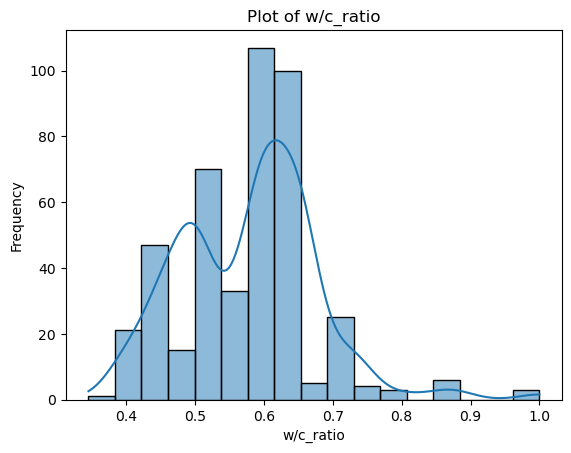

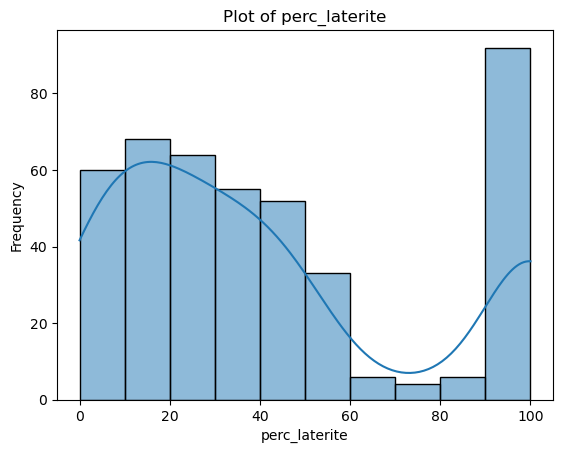

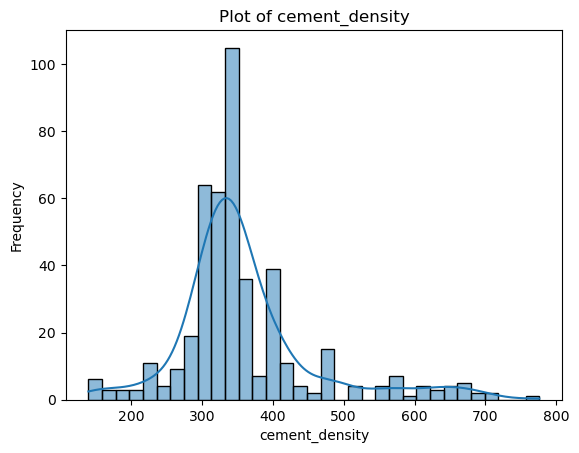

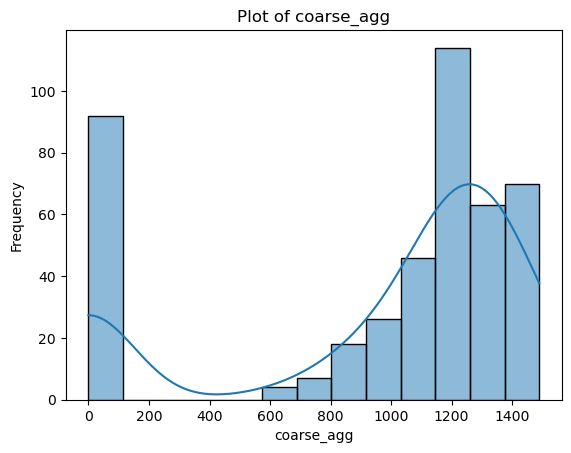

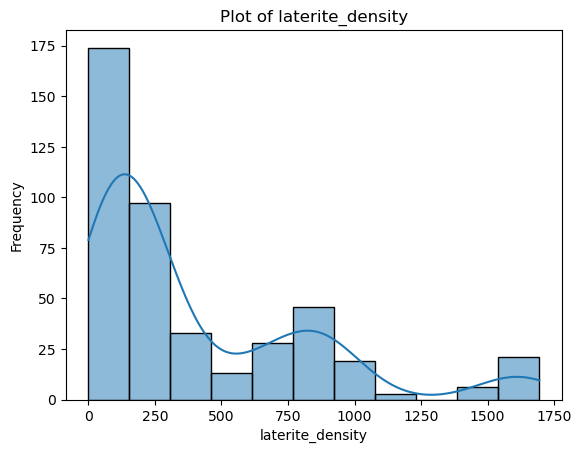

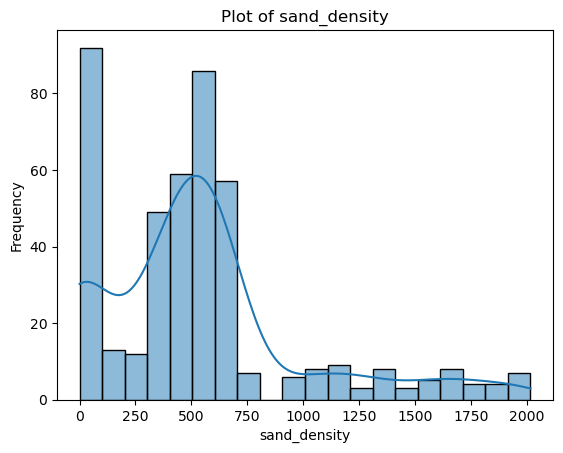

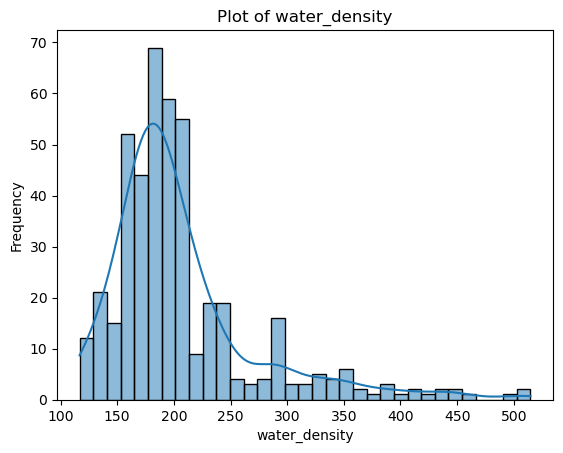

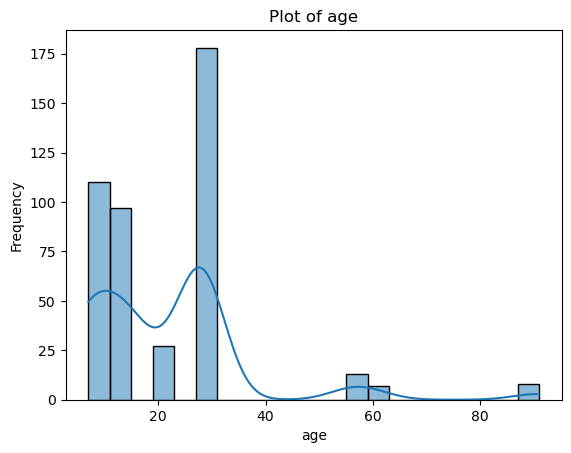

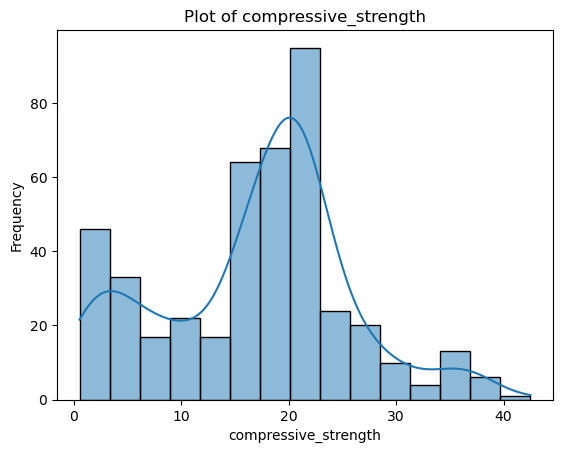

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for label in df:
    sns.histplot(df[label],kde=True, fill=True)
    plt.title( f'Plot of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()


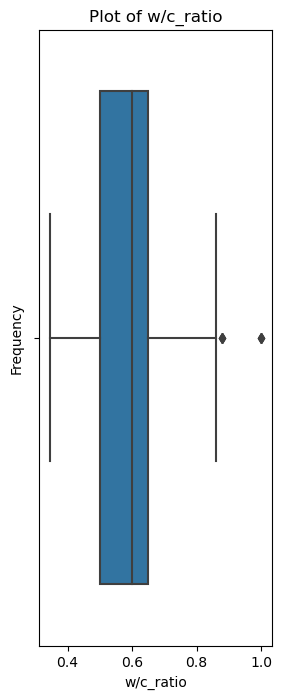

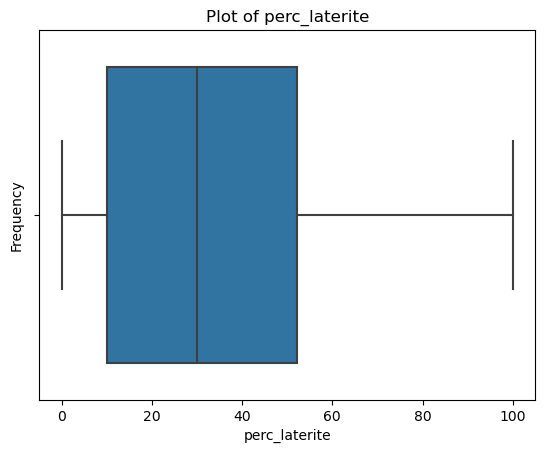

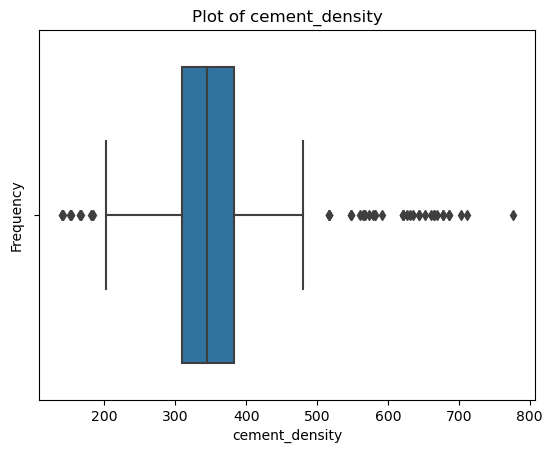

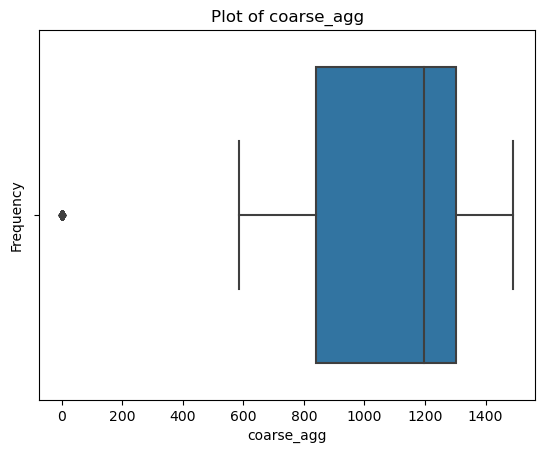

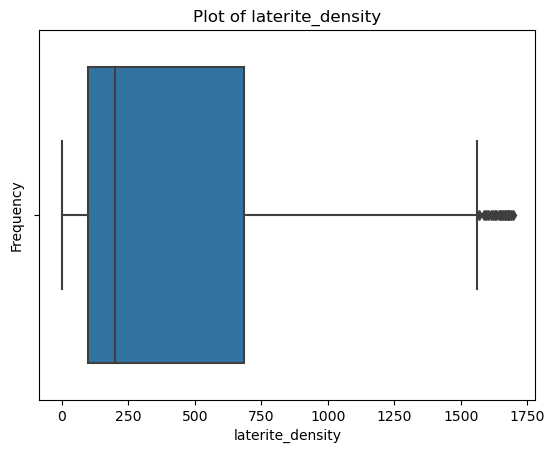

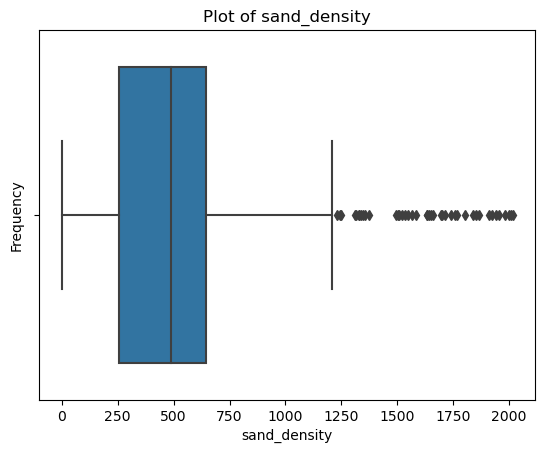

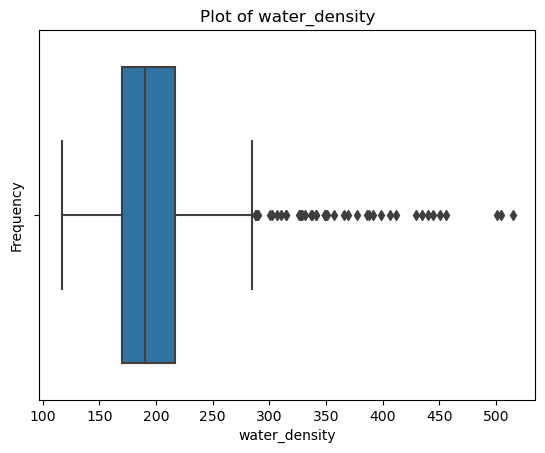

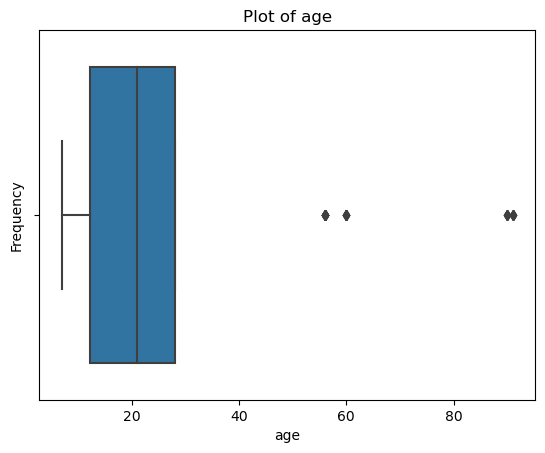

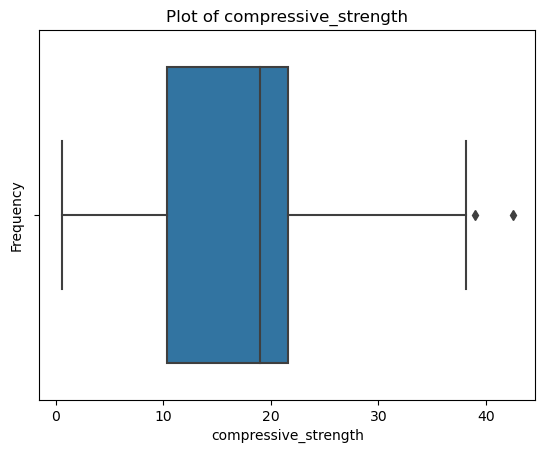

In [9]:
plt.figure(figsize=(3,8))
for label in df:
    sns.boxplot(x=df[label])
    plt.title( f'Plot of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


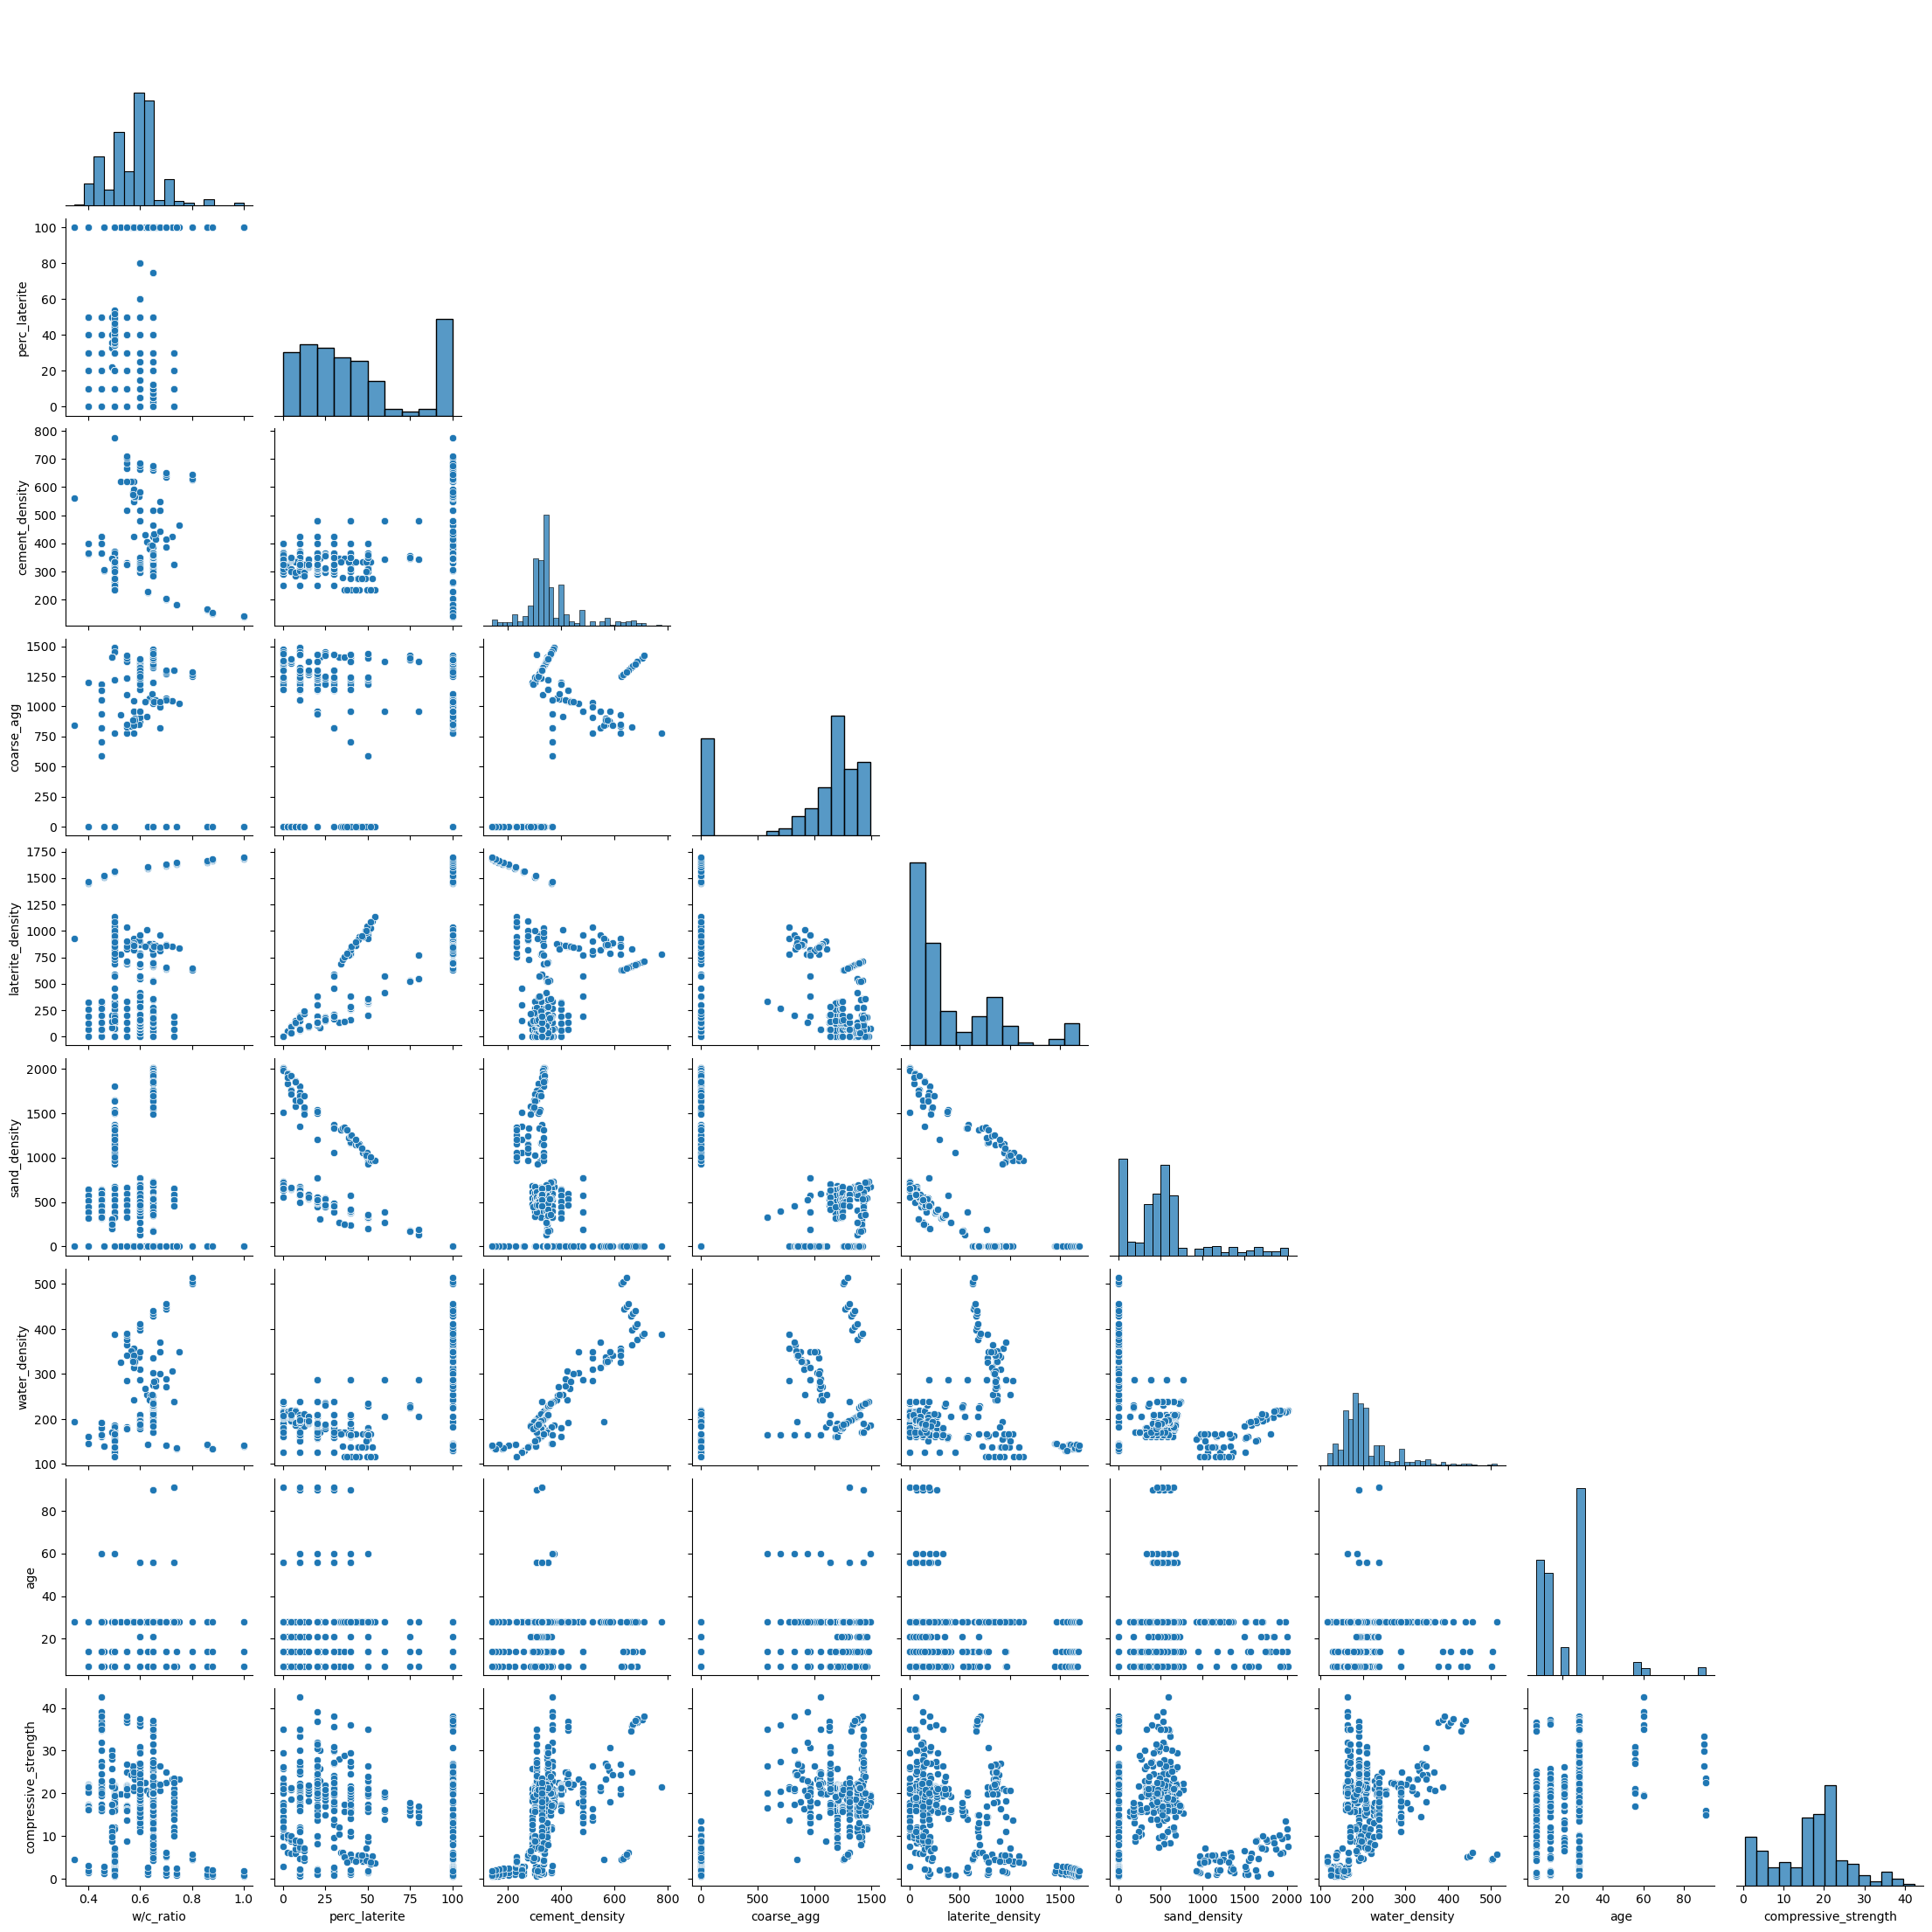

In [10]:
sns.pairplot(data=df, corner=True)
plt.show()

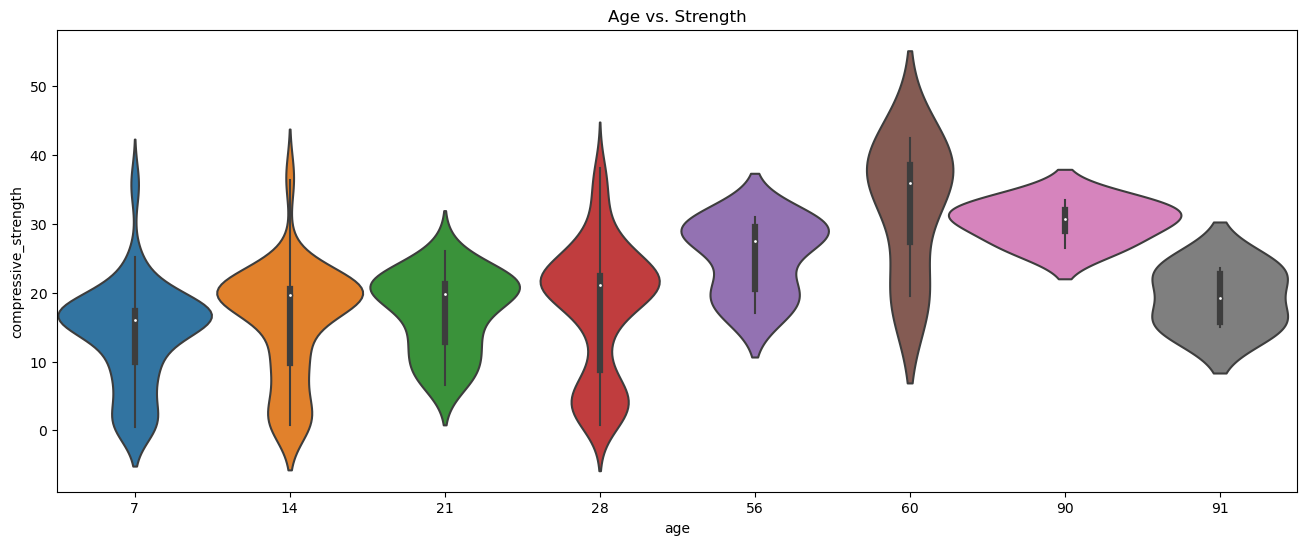

In [11]:
plt.figure(figsize=(16, 6), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=df, x="age", y="compressive_strength", width=1.5)
plt.show()

#### Checking Correlation of each column

In [12]:
df.corr()

,w/c_ratio,perc_laterite,cement_density,coarse_agg,laterite_density,sand_density,water_density,age,compressive_strength
w/c_ratio,1.000000,0.209664,-0.172510,-0.002814,0.222661,-0.116284,0.339041,0.107584,-0.137885
perc_laterite,0.209664,1.000000,0.374262,-0.180085,0.849077,-0.674933,0.435013,-0.020550,-0.145103
cement_density,-0.172510,0.374262,1.000000,0.313860,0.000126,-0.354049,0.850084,-0.004353,0.438809
coarse_agg,-0.002814,-0.180085,0.313860,1.000000,-0.558959,-0.474708,0.294249,0.051127,0.691465
laterite_density,0.222661,0.849077,0.000126,-0.558959,1.000000,-0.405437,0.080815,-0.024256,-0.458871
sand_density,-0.116284,-0.674933,-0.354049,-0.474708,-0.405437,1.000000,-0.347477,-0.007649,-0.322510
water_density,0.339041,0.435013,0.850084,0.294249,0.080815,-0.347477,1.000000,0.048752,0.311561
age,0.107584,-0.020550,-0.004353,0.051127,-0.024256,-0.007649,0.048752,1.000000,0.321639
compressive_strength,-0.137885,-0.145103,0.438809,0.691465,-0.458871,-0.322510,0.311561,0.321639,1.000000


Text(0.5, 1.0, "Pearson's Correlation Heatmap")

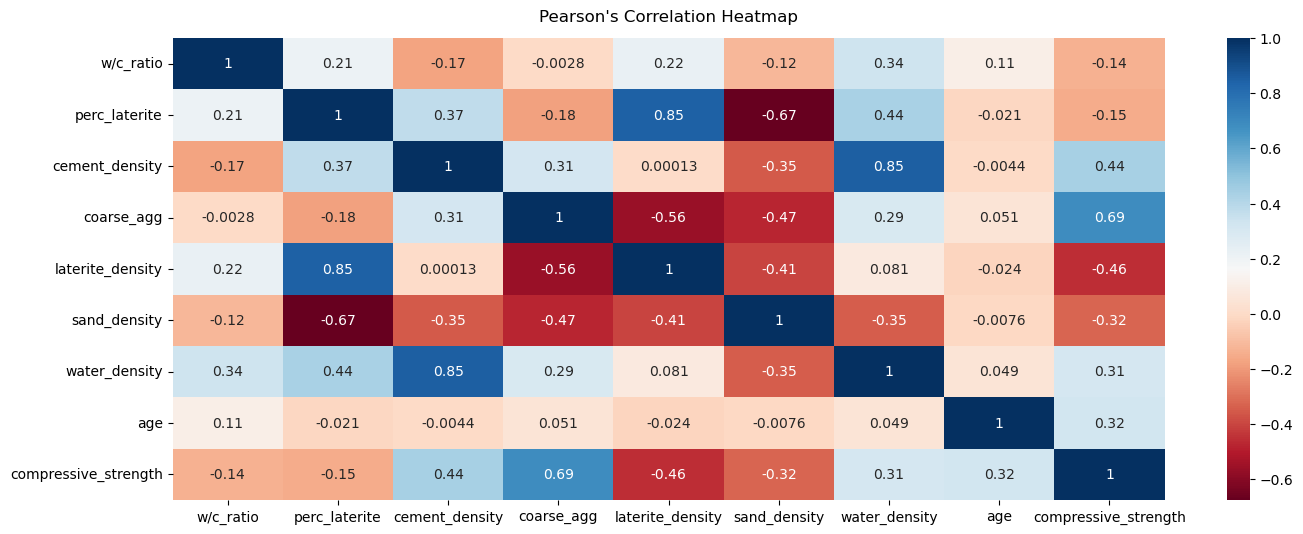

In [13]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title("Pearson's Correlation Heatmap", fontdict={'fontsize':12}, pad=12)

### Checking correlations of each column to the compressive strength

In [14]:
import scipy.stats
correlations = []
for col in df.columns.drop('compressive_strength'):
    val = scipy.stats.pearsonr(df[col],df.compressive_strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)

,Feature,Correlation with Strength
3,coarse_agg,0.691465
2,cement_density,0.438809
7,age,0.321639
6,water_density,0.311561
0,w/c_ratio,-0.137885
1,perc_laterite,-0.145103
5,sand_density,-0.322510
4,laterite_density,-0.458871


##### from the table above we see that coarse_agg correlates more with the output compressive_strength with a correlation value of 0.69


## Model Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


X = df[['w/c_ratio', 'perc_laterite', 'cement_density','coarse_agg',
       'laterite_density','sand_density', 'water_density', 'age']]  
y = df['compressive_strength']

#splitting the data into 20% test, 70% train and 10% validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the train data into train (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)



In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [17]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'CATBoost': CatBoostRegressor(silent=True)
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': []}

kf = KFold(n_splits=6, shuffle=True, random_state=42) 

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)

               Model  Mean RMSE   Mean R2
3           CATBoost   2.986116  0.893145
2      Random Forest   3.679421  0.835188
1      Decision Tree   4.128725  0.773929
0  Linear Regression   4.906125  0.700323


from the result above, we can see that CatBoost model gives the highest R-squared result so we fine tune the catboost model to enhance its parameters

## Hyperparameter tuning for CatBoost using RandomizedSearchCV

In [20]:
def snippet():
    
     print(format('How to find optimal parameters for catboost using RandomizedSearchCV for Regression','*^82'))
                 
     import warnings
     warnings.filterwarnings('ignore')

     from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

     model = CatBoostRegressor(verbose=False)
     parameters = {
         'n_estimators':[10,50,100,200,400],
         'depth' : [6,8,10,12],
         'learning_rate':[0.01,0.09,0.1,0.2,0.3005,0.30025,0.4],
     }
     grid = RandomizedSearchCV(estimator=model,param_distributions = parameters, cv= 6, n_jobs=-1)
     grid.fit(X_train, y_train)

     print("====================================================")
     print('Results from Randomized Search')
     print("====================================================")
     print("the best score across all params:\n",grid.best_score_)
     print("====================================================")
     print("the best parameters are: \n",grid.best_params_)
snippet()
    

How to find optimal parameters for catboost using RandomizedSearchCV for Regression
Results from Randomized Search
the best score across all params:
 0.8883038182910244
the best parameters are: 
 {'n_estimators': 200, 'learning_rate': 0.2, 'depth': 8}


### Training CatBoost with optimised Parameters

we fit in the parameters gotten from our search into the model

In [21]:
model = CatBoostRegressor(n_estimators = 400, max_depth = 6, learning_rate = .4, random_state = 42, verbose=False)

In [22]:
model.fit(X_train, y_train)

### Using the model to make predictions on our Test set

In [23]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized CatBoostRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized CatBoostRegressor got the following scores on the test set:
R-squared: 0.9508594561642029
MSE: 3.1874539658179244
RMSE: 1.7853442149394958
MAE: 1.198277908441607


### we have R-squared of 0.9508

This can be interpreted as: Our model can account for 95.08% of the variance in the data.

### Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [24]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
3,coarse_agg,58.397826
7,age,14.628293
6,water_density,7.720021
2,cement_density,7.562930
4,laterite_density,5.186935
0,w/c_ratio,3.786865
5,sand_density,1.636925
1,perc_laterite,1.080205


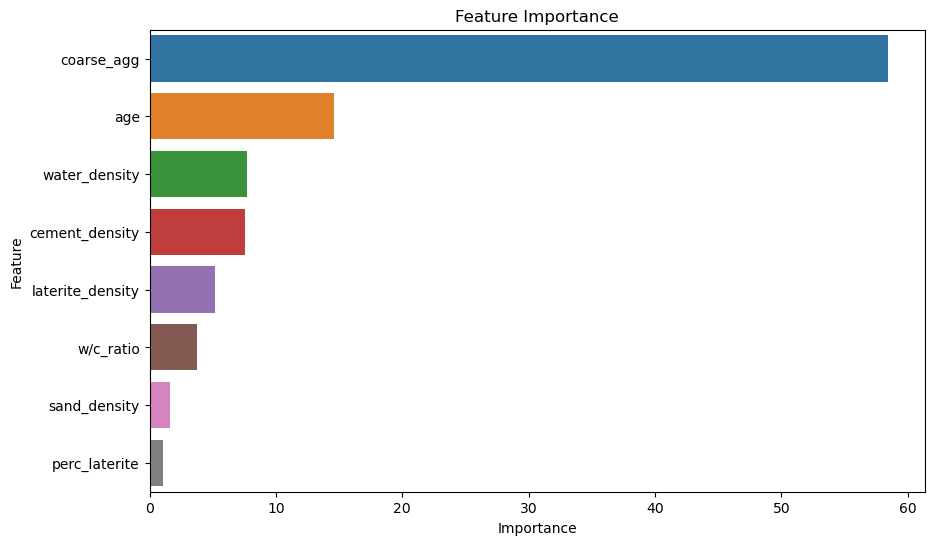

In [25]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

The summary plot illustrates that coarse_agg consistently contributes the most to the model's predictions across the dataset. Individual force plots further highlight its impact on specific instances